In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Load Summaries

In [2]:
data = pd.read_csv('pocket_gems.csv')
data.head()

,name,title,background,fav_game,game_char
0,Daniel Terry,Co-Founder / CCO & Executive Chairman,"Cornell Computer Science, Stanford MBA; Machin...","Super Mario Bros, duh",Peter Pepper in BurgerTime
1,Harlan Crystal,Co-Founder / CTO,Born and raised in NYC. BA in Computer Science...,Marble Madness,Magus from Chrono Trigger
2,Fletcher,I break games,BA in Business Management and Economics from U...,Ahh there’s so many but top 3: New Zealand Sto...,Duke Nukem
3,David,Backend Hacker,Stanford MSCS; open-source enthusiast (Virtual...,"Run, and then run some more",Fomor
4,Jeff,Pixel Pusher,"First there were only 2 colors, then 4, then 1...",Temple of Apshai,My Tauren Druid


In [3]:
background = data.background.tolist()
background[:5]

['Cornell Computer Science, Stanford MBA; Machine learning research (fast object detection techniques using AdaBoost derivatives; licensed to Like.com, sold to Google), VP Engineering at Smartleaf (large RoR SAAS application).',
 'Born and raised in NYC. BA in Computer Science from Cornell and grad school dropout. Prior to Pocket Gems, hacked for startups in computer vision, compilers, embedded-realtime, bioinformatics and financial software.',
 'BA in Business Management and Economics from UC Santa Cruz; past life worked as a Product Manager at Smith Micro Software',
 'Stanford MSCS; open-source enthusiast (Virtual Network System, gae-sessions, ENVI). Won best demo award at SIGCOMM two years in row with the OpenFlow team.',
 'First there were only 2 colors, then 4, then 16, then 256!']

## Tokenization with Spacy

In [4]:
import re
import string
from sklearn.feature_extraction import stop_words

def tokenize(text):
    """
    Tokenize text and return a non-unique list of tokenized words
    found in the text. Normalize to lowercase, strip punctuation,
    remove stop words, drop words of length < 3.
    """
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)  # delete stuff but leave at least a space to avoid clumping together
    words = nopunct.split(" ")
    words = [w for w in words if len(w) > 2]  # ignore a, an, to, at, be, ...
    words = [w.lower() for w in words]
    words = [word for word in words if word not in stop_words.ENGLISH_STOP_WORDS]
    return words

In [5]:
words = []
for b in background:
    words.extend(tokenize(b))

In [6]:
words[:15]

['cornell',
 'computer',
 'science',
 'stanford',
 'mba',
 'machine',
 'learning',
 'research',
 'fast',
 'object',
 'detection',
 'techniques',
 'using',
 'adaboost',
 'derivatives']

In [7]:
background[0]

'Cornell Computer Science, Stanford MBA; Machine learning research (fast object detection techniques using AdaBoost derivatives; licensed to Like.com, sold to Google), VP Engineering at Smartleaf (large RoR SAAS application).'

In [8]:
text = " ".join(words)

## Load Pocket Gems Logo

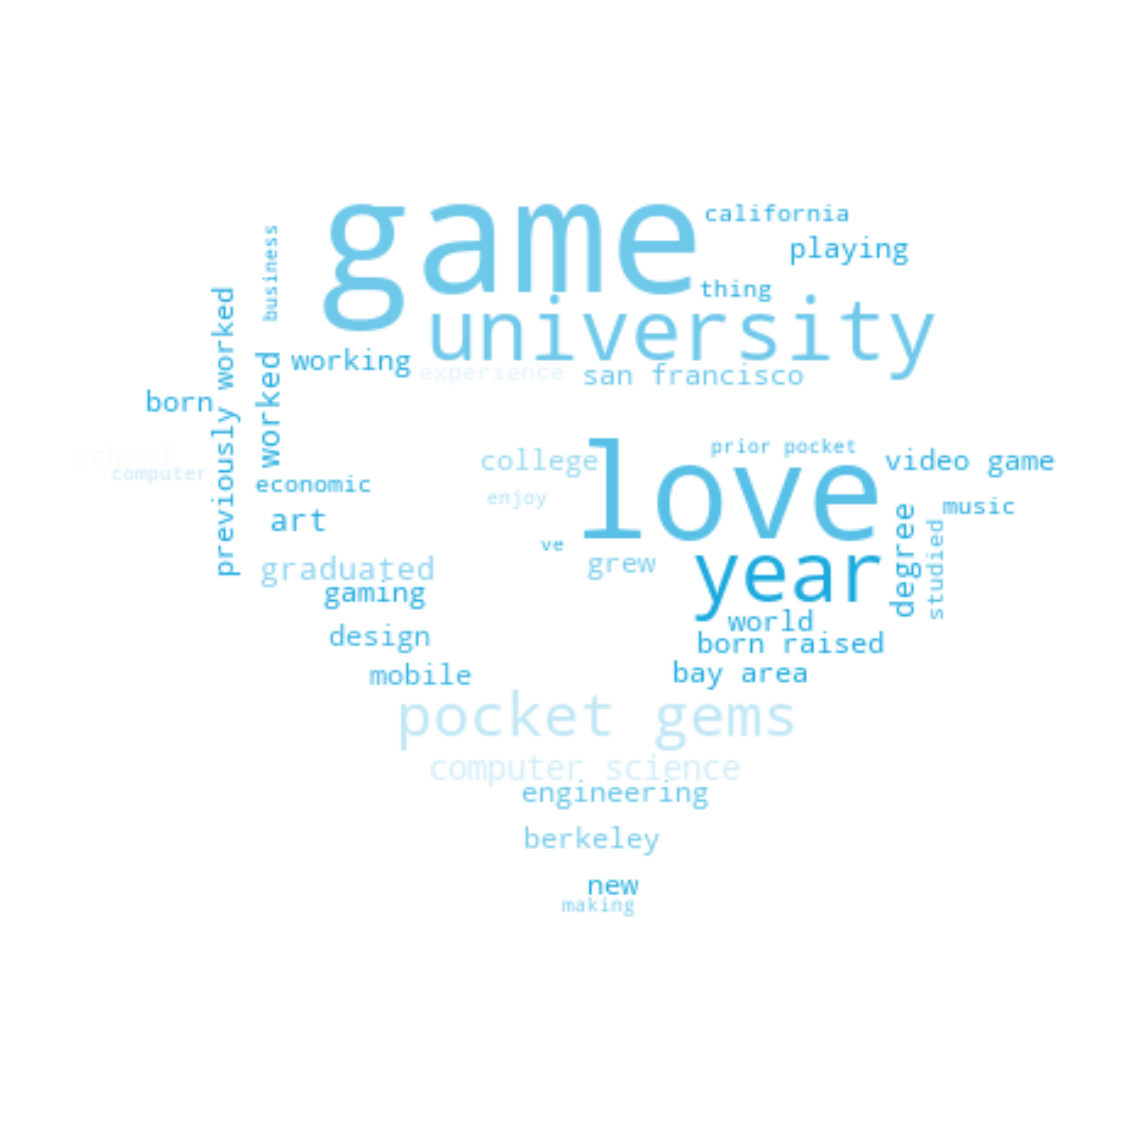

In [20]:
mask = np.array(Image.open("logo.jpg"))
wc = WordCloud(background_color="white", max_words=40, mask=mask,
               max_font_size=90, random_state=88)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()